```{admonition} Lecture Materials
:class: tip
[Download the slide deck for this lecture](/_static/pdf/Lecture16-PartialDifferentialEquations-2.pdf)
```

In [1]:
import numpy as np

# Solve tridiagonal system of linear equations
#  d: vector of diagonal elements
#  l: vector of elements on the lower subdiagonal
#  u: vector of elements on the upper superdiagonal
# v0: right-hand-side vector
def linsolve_tridiagonal(d, l, u, v0):
    # Initialization
    N = len(v0)
    a = d.copy() # Current diagonal elements
    b = u.copy() # Current upper diagonal elements
    v = v0.copy()
    
    # Gaussian elimination
    for r in range(N):
        if (a[r] == 0.):
            print("Diagonal element is zero! Cannot solve the tridiagonal system with simple Gaussian elimination")
            return None
        b[r] /= a[r]
        v[r] /= a[r]
        a[r] = 1.
        if (r < N - 1):
            a[r + 1] -= l[r+1] * b[r]
            v[r + 1] -= l[r+1] * v[r]
            
    # Backsubstitution
    x = np.empty(N,float)
    
    x[N - 1] = v[N - 1]
    for r in range(N-2,-1,-1):
        x[r] = v[r] - b[r] * x[r + 1]
            
    return x

# Initial value problem: Wave equation

Wave equation is an example of a second-order linear PDE describing the waves and standing wave fields. In one dimensions it reads

$$
\frac{\partial^2 \phi}{\partial t^2} = v^2 \frac{\partial^2 \phi}{\partial x^2}.
$$

Since it is a 2nd order PDE, it is supplemented by initial conditions for both $\phi(t=0,x)$ and $\phi_t'(t=0,x)$:
\begin{align*}
\phi(t=0,x) & = \phi_0(x) ,\\
\phi_t'(t=0,x) & = \phi'_0(x).
\end{align*}

The boundary conditions can be of either Dirichlet
\begin{align*}
\phi(t,x=0) & = \phi_{\rm left}(t) ,\\
\phi(t,x=L) & = \phi_{\rm right}(t),
\end{align*}
or Neumann 
\begin{align*}
\phi'_x(t,x=0) & = \phi'_{\rm left}(t) ,\\
\phi'_x(t,x=L) & = \phi'_{\rm right}(t),
\end{align*}
forms.

We shall focus on the Dirichlet form.

## Finite difference approach


To deal with the second-order time derivative we denote

$$
\psi(t,x) \equiv \frac{\partial \phi}{\partial t}.
$$

This way we are dealing with a system of first-order (in $t$) PDEs
\begin{align*}
\frac{\partial \phi}{\partial t} = \psi(t,x), \\
\frac{\partial \psi}{\partial t} = v^2 \frac{\partial^2 \phi}{\partial x^2}.
\end{align*}

To apply the finite difference method we first approximate the derivative $\partial^2 \phi / \partial x^2$ by the lowest order central difference, just like for the heat equation,

$$
\frac{\partial^2 \phi(t,x)}{\partial x^2} \approx \frac{\phi(t,x+a) - 2\phi(t,x) + \phi(t,x-a)}{a^2}.
$$

To solve the PDEs numerically we apply the same procedure as for the heat equation, but for $\phi(t,x)$ and $\psi(t,x)$ simultaneously.
Denoting $\phi(t = nh,x = ka) = \phi^n_k$ and $\psi(t = nh,x = ka) = \psi^n_k$ we get

### FTCS scheme

\begin{align*}
\phi^{n+1}_k & = \phi^{n}_k + h \psi^n_k, \\
\psi^{n+1}_k & = \psi^n_k + r \, (\phi^n_{k+1} - 2\phi^n_k + \phi^n_{k-1}), \qquad k = 1 \ldots N-1.
\end{align*}

### Implicit scheme

\begin{align*}
\phi^{n+1}_k & = \phi^{n}_k + h \psi^{n+1}_k, \\
\psi^{n+1}_k & = \psi^n_k + r \, (\phi^{n+1}_{k+1} - 2\phi^{n+1}_k + \phi^{n+1}_{k-1}), \qquad k = 1 \ldots N-1.
\end{align*}

### Crank-Nicolson scheme

\begin{align*}
\phi^{n+1}_k & = \phi^{n}_k + \frac{h}{2} \left[ \psi^{n+1}_k + \psi^{n}_k\right], \\
\psi^{n+1}_k & = \psi^n_k + \frac{r}{2} \, (\phi^{n+1}_{k+1} - 2\phi^{n+1}_k + \phi^{n+1}_{k-1}) + \frac{r}{2} \, (\phi^{n}_{k+1} - 2\phi^{n}_k + \phi^{n}_{k-1}), \qquad k = 1 \ldots N-1.
\end{align*}

<!-- ### Simulation -->

## FTCS scheme

Let us simulate the wave equation using the FTCS scheme.

In [2]:
import numpy as np

# Single iteration of the FTCS scheme in the time direction
# h is the time step
# r = Dh/a^2 is the dimensionless parameter
def wave_FTCS_iteration(phi, psi, h, r):
    N = len(phi) - 1
    
    phinew = np.empty_like(phi)
    psinew = np.empty_like(psi)
    
    # Boundary conditions (here static Dirichlet)
    phinew[0] = phi[0]
    phinew[N] = phi[N]
    psinew[0] = 0.
    psinew[N] = 0.
    
    
    # FTCS scheme
    for i in range(1,N):
        phinew[i] = phi[i] + h * psi[i]
        psinew[i] = psi[i] + r * (phi[i+1] - 2 * phi[i] + phi[i-1])
        
    return phinew, psinew


# Perform nsteps FTCS time iterations for the heat equation
# u0: the initial profile
# h: the size of the time step
# nsteps: number of time steps
# a: the spatial cell size
# D: the diffusion constant
def wave_FTCS_solve(phi0, psi0, h, nsteps, a, v = 1.):
    phi = phi0.copy()
    psi = psi0.copy()
    r = h * v**2 / a**2
    for i in range(nsteps):
        phi, psi = wave_FTCS_iteration(phi, psi, h, r)
        
    return phi, psi

Simulation

Solving the wave equation with FTCS scheme
r = h*v^2/a^2 = 1.0000000000000002


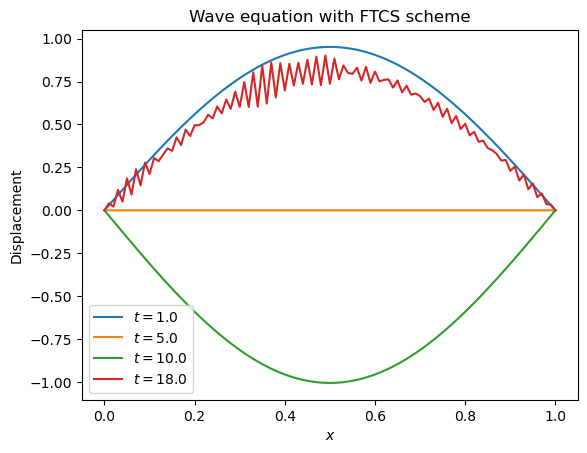

CPU times: user 1.04 s, sys: 1.59 s, total: 2.63 s
Wall time: 529 ms


In [3]:
%%time

# Constants
L = 1         # Length
v = 0.1       # Wave propagation speed
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-2      # Time-step

print("Solving the wave equation with FTCS scheme")
print("r = h*v^2/a^2 =",h*v**2/a**2)



# Initialize
phi = np.array([np.sin(k*np.pi/N) for k in range(N+1)])
psi = np.zeros([N+1],float)

# For the output
times    = [ 1., 5., 10., 18.]
profiles = []
xk       = [k*a for k in range(0,N+1)]

current_time = 0.
for time in times:
    nsteps = round((time - current_time)/h)
    phi, psi = wave_FTCS_solve(phi, psi, h, nsteps, a, v)
    profiles.append(phi.copy())
    current_time = time
    
import matplotlib.pyplot as plt
plt.title("Wave equation with FTCS scheme")
plt.xlabel('${x}$')
plt.ylabel('Displacement')
for i in range(len(times)):
    plt.plot(xk,profiles[i],label="${t=}$" + str(times[i]))
plt.legend()
plt.show()

![](wave_equation_1D_FTCS.gif)

In [4]:
%%time

from matplotlib.animation import FuncAnimation

# Constants
L = 1         # Length
v = 0.1       # Wave propagation speed
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-2      # Time-step

# For plotting
xk       = [k*a for k in range(0,N+1)]

# Initialize for the three schemes
phi1 = np.array([np.sin(k*np.pi/N) for k in range(N+1)])
psi1 = np.zeros([N+1],float)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 5, forward=True)
fig.suptitle("Wave equation", fontsize = 18)
current_time = 0

ax.set_xlabel('${x}$')
ax.set_ylabel('Displacement')
line = ax.plot(xk,phi1,label="FTCS")[0]
title = ax.set_title('${t=}$' + "0.000 s")
plt.legend(loc="upper right")
plt.xlim(0,L)
plt.ylim(-1.1,1.1)

def animate_wave_equation_1D_FTCS(i):
    global fps, tottime, tend
    nsteps = round((tend/tottime/fps)/h)
    global phi1, psi1, phi2, psi2, phi3, psi3, current_time
    phi1, psi1 = wave_FTCS_solve(phi1, psi1, h, nsteps, a, v)
    current_time += h * nsteps
    title.set_text('${t=}$' + "{:.3f}".format(current_time))
    line.set_ydata(phi1)
    return [line, title]

fps = 30
tend = 20.
tottime = 10.
ani = FuncAnimation(fig, animate_wave_equation_1D_FTCS, frames=round(fps * tottime), interval=1000/fps, repeat=False)
plt.close();

# from IPython.display import HTML
# HTML(ani.to_jshtml(default_mode="loop"))

CPU times: user 14.7 ms, sys: 1.29 ms, total: 15.9 ms
Wall time: 6.1 ms


One can see the instability of the FTCS scheme for the wave equation.
While initially the wave is propagating, the amplitude of the wave grows exponentially.

## Implicit scheme

As we learned earlier, implicit schemes are more stable than explicit ones. 
Let us use the implicit scheme for the time derivative in the wave equation:

\begin{align*}
\phi^{n+1}_k & = \phi^{n}_k + h \psi^{n+1}_k, \\
\psi^{n+1}_k & = \psi^n_k + r \, (\phi^{n+1}_{k+1} 
- 2\phi^{n+1}_{k} + \phi^{n+1}_{k-1}), \qquad k = 1 \ldots N-1.
\end{align*}

Substituting the first equation into the second one gets the tridiagonal system of linear equations for $\psi^{n+1}_k$:
$$
-rh \psi^{n+1}_{k+1} + (1+2rh) \psi^{n+1}_k - rh \psi^{n+1}_{k-1} = \psi^n_k + r \, (\phi^{n}_{k+1} - 2\phi^{n}_k + \phi^{n}_{k-1}), \quad k = 1\ldots N-1
$$

Once the tridiagonal system is solved, we can find $\phi^{n+1}_k$ using the first equation.

In [5]:
import numpy as np

# Single iteration of the FTCS scheme in the time direction
# h is the time step
# r = Dh/a^2 is the dimensionless parameter
def wave_implicit_iteration(phi, psi, h, r):
    N = len(phi) - 1
    
    phinew = np.empty_like(phi)
    psinew = np.empty_like(psi)
    
    # Boundary conditions (here static Dirichlet)
    phinew[0] = phi[0]
    phinew[N] = phi[N]
    psinew[0] = 0.
    psinew[N] = 0.
    
    # Tridiagonal system for psi
    d  = np.full(N-1, 1+2.*r*h)
    ud = np.full(N-1, -r*h)
    ld = np.full(N-1, -r*h)
    v  = np.array(psi[1:N] + r*phi[2:] - 2*r*phi[1:N] + r*phi[:-2])
    v[0]   += r * h * psi[0]
    v[N-2] += r * h * psi[N]
    
    psinew[1:N] = linsolve_tridiagonal(d,ld,ud,v)
    
    # Final step for phi
    for i in range(1,N):
        phinew[i] = phi[i] + h * psinew[i]
        
    return phinew, psinew


# Perform nsteps FTCS time iterations for the heat equation
# u0: the initial profile
# h: the size of the time step
# nsteps: number of time steps
# a: the spatial cell size
# D: the diffusion constant
def wave_implicit_solve(phi0, psi0, h, nsteps, a, v = 1.):
    phi = phi0.copy()
    psi = psi0.copy()
    r = h * v**2 / a**2
    for i in range(nsteps):
        phi, psi = wave_implicit_iteration(phi, psi, h, r)
        
    return phi, psi

Simulation

Solving the wave equation with FTCS scheme
r = h*v^2/a^2 = 1.0000000000000002


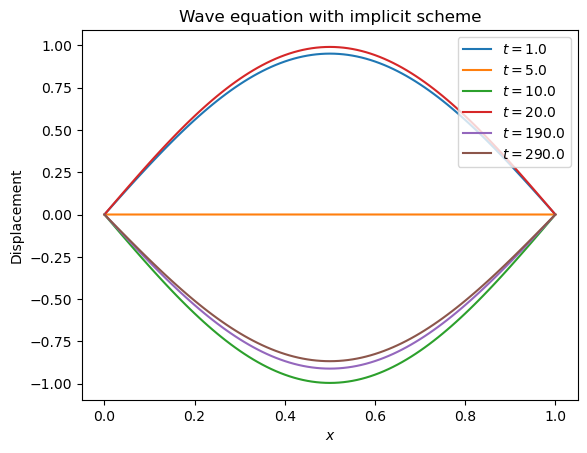

CPU times: user 4.06 s, sys: 68.3 ms, total: 4.13 s
Wall time: 3.83 s


In [6]:
%%time

# Constants
L = 1         # Length
v = 0.1       # Wave propagation speed
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-2      # Time-step

print("Solving the wave equation with FTCS scheme")
print("r = h*v^2/a^2 =",h*v**2/a**2)

# Initialize
phi = np.array([np.sin(k*np.pi/N) for k in range(N+1)])
psi = np.zeros([N+1],float)

# For the output
times    = [ 1., 5., 10., 20., 190., 290.]
profiles = []
xk       = [k*a for k in range(0,N+1)]

current_time = 0.
for time in times:
    nsteps = round((time - current_time)/h)
    phi, psi = wave_implicit_solve(phi, psi, h, nsteps, a, v)
    profiles.append(phi.copy())
    current_time = time
    
plt.title("Wave equation with implicit scheme")
plt.xlabel('${x}$')
plt.ylabel('Displacement')
for i in range(len(times)):
    plt.plot(xk,profiles[i],label="${t=}$" + str(times[i]))
plt.legend()
plt.show()

One can see that the implicit scheme remains stable compared to the explicit one.
However, the wave amplitude decreases with time, indicating damping. For this reason the implicit scheme is not a good choice for the wave equation over long times.

## Crank-Nicolson scheme

\begin{align*}
\phi^{n+1}_k & = \phi^{n}_k + \frac{h}{2} \left[ \psi^{n+1}_k + \psi^{n}_k\right], \\
\psi^{n+1}_k & = \psi^n_k + \frac{r}{2} \, (\phi^{n+1}_{k+1} - 
2\phi^{n+1}_k + \phi^{n+1}_{k-1}) + 
\frac{r}{2} \, (\phi^{n}_{k+1} - 2\phi^{n}_k + \phi^{n}_{k-1}), \qquad k = 1 \ldots N-1.
\end{align*}

Substituting the first equation into the second one gets the tridiagonal system of linear equations for $\psi^{n+1}_k$:
$$
-rh \psi^{n+1}_{k+1} + 2(1+rh) \psi^{n+1}_k - rh \psi^{n+1}_{k-1} = 2 \psi^n_k + 2r \, (\phi^{n}_{k+1} - 2\phi^{n}_k + \phi^{n}_{k-1}) + rh \, (\psi^{n}_{k+1} - 2\psi^{n}_k + \psi^{n}_{k-1}), \quad k = 1\ldots N-1.
$$

This system can be solved using the same tridiagonal solver as before.


In [7]:
import numpy as np

# Single iteration of the FTCS scheme in the time direction
# h is the time step
# r = Dh/a^2 is the dimensionless parameter
def wave_crank_nicolson_iteration(phi, psi, h, r):
    N = len(phi) - 1
    
    phinew = np.empty_like(phi)
    psinew = np.empty_like(psi)
    
    # Boundary conditions (here static Dirichlet)
    phinew[0] = phi[0]
    phinew[N] = phi[N]
    psinew[0] = 0.
    psinew[N] = 0.
    
    # Tridiagonal system for psi
    d  = np.full(N-1, 2*(1+r*h))
    ud = np.full(N-1, -r*h)
    ld = np.full(N-1, -r*h)
    v  = np.array(2*psi[1:N] + 2*r*phi[2:] - 4*r*phi[1:N] + 2*r*phi[:-2] \
                  + r*h*psi[2:] - 2*r*h*psi[1:N] + r*h*psi[:-2])
    v[0]   += r * h * psi[0]
    v[N-2] += r * h * psi[N]
    
    psinew[1:N] = linsolve_tridiagonal(d,ld,ud,v)
    
    # Final step for phi
    for i in range(1,N):
        phinew[i] = phi[i] + h * (psinew[i] + psi[i]) / 2
        
    return phinew, psinew


# Perform nsteps FTCS time iterations for the heat equation
# u0: the initial profile
# h: the size of the time step
# nsteps: number of time steps
# a: the spatial cell size
# D: the diffusion constant
def wave_crank_nicolson_solve(phi0, psi0, h, nsteps, a, v = 1.):
    phi = phi0.copy()
    psi = psi0.copy()
    r = h * v**2 / a**2
    for i in range(nsteps):
        phi, psi = wave_crank_nicolson_iteration(phi, psi, h, r)
        
    return phi, psi

Simulation

Solving the wave equation with FTCS scheme
r = h*v^2/a^2 = 1.0000000000000002


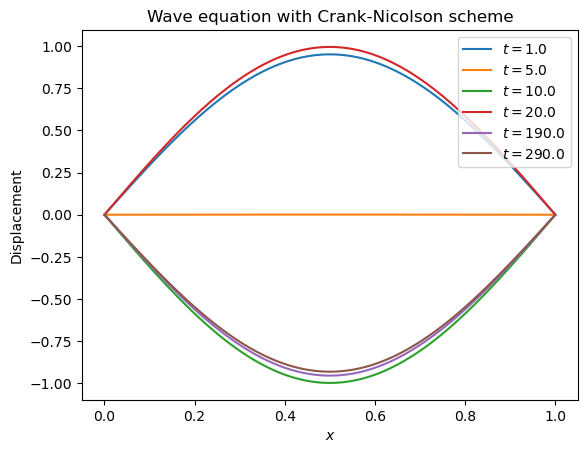

CPU times: user 4.6 s, sys: 89.9 ms, total: 4.69 s
Wall time: 4.28 s


In [8]:
%%time

# Constants
L = 1         # Length
v = 0.1       # Wave propagation speed
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-2      # Time-step

print("Solving the wave equation with FTCS scheme")
print("r = h*v^2/a^2 =",h*v**2/a**2)



# Initialize
phi = np.array([np.sin(k*np.pi/N) for k in range(N+1)])
psi = np.zeros([N+1],float)

# For the output
times    = [ 1., 5., 10., 20., 190., 290.]
profiles = []
xk       = [k*a for k in range(0,N+1)]

current_time = 0.
for time in times:
    nsteps = round((time - current_time)/h)
    phi, psi = wave_crank_nicolson_solve(phi, psi, h, nsteps, a, v)
    profiles.append(phi.copy())
    current_time = time
    
plt.title("Wave equation with Crank-Nicolson scheme")
plt.xlabel('${x}$')
plt.ylabel('Displacement')
for i in range(len(times)):
    plt.plot(xk,profiles[i],label="${t=}$" + str(times[i]))
plt.legend()
plt.show()

This simulation appears to conserve the energy of the wave.

Let us compare the three schemes.

![](wave_equation_1D.gif)

In [9]:
%%time

from matplotlib.animation import FuncAnimation

# Constants
L = 1         # Length
v = 0.1       # Wave propagation speed
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-2      # Time-step

# For plotting
xk       = [k*a for k in range(0,N+1)]

# Initialize for the three schemes
phi1 = np.array([np.sin(k*np.pi/N) for k in range(N+1)])
psi1 = np.zeros([N+1],float)
phi2 = phi1.copy()
psi2 = psi1.copy()
phi3 = phi1.copy()
psi3 = psi1.copy()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 5, forward=True)
fig.suptitle("Wave equation", fontsize = 18)
current_time = 0

ax.set_xlabel('${x}$')
ax.set_ylabel('Displacement')
line1 = ax.plot(xk,phi1,label="FTCS")[0]
line2 = ax.plot(xk,phi2,label="Implicit")[0]
line3 = ax.plot(xk,phi3,label="Crank-Nicolson")[0]
title = ax.set_title('${t=}$' + "0.000 s")
plt.legend(loc="upper right")
plt.xlim(0,L)
plt.ylim(-1.1,1.1)

def animate_wave_equation_1D(i):
    global fps, tottime, tend
    nsteps = round((tend/tottime/fps)/h)
    global phi1, psi1, phi2, psi2, phi3, psi3, current_time
    phi1, psi1 = wave_FTCS_solve(phi1, psi1, h, nsteps, a, v)
    phi2, psi2 = wave_implicit_solve(phi2, psi2, h, nsteps, a, v)
    phi3, psi3 = wave_crank_nicolson_solve(phi3, psi3, h, nsteps, a, v)
    current_time += h * nsteps

    line1.set_ydata(phi1)
    line2.set_ydata(phi2)
    line3.set_ydata(phi3)
    title.set_text('${t=}$' + "{:.3f}".format(current_time))
    return [line1, line2, line3, title]

fps = 30
tend = 200.
tottime = 10.
ani = FuncAnimation(fig, animate_wave_equation_1D, frames=round(fps * tottime), interval=1000/fps, repeat=False)
plt.close()

# from IPython.display import HTML
# HTML(ani.to_jshtml(default_mode="loop"))

CPU times: user 24.8 ms, sys: 1.73 ms, total: 26.6 ms
Wall time: 8.19 ms


/opt/anaconda3/envs/CompPhys/lib/python3.10/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


### Pulse propagation

Let us now consider corresponding to a pulse in the initial condition.
The boundary conditions are Dirichlet: $\phi(0,t) = \phi(L,t) = 0$.
We expect the pulse to propagate to the right with speed $v$ and then reflect back.

We take zero displacement in the initial condition and a Gaussian pulse in the initial velocity:

$$
\psi(x,0)  \propto \exp\left(-\frac{(x-d)^2}{2\sigma^2}\right).
$$


In [10]:
# Constants
L = 1         # Length
d = 0.1       # Initial profile
sig = 0.3     # Initial profile
v = 100.      # Wave propagation speed
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-6      # Time-step


# Initialize
phi1 = np.zeros([N+1],float)
xk = np.array([a*k for k in range(N+1)])
psi1 = xk * (L - xk) / L**2 * np.exp(-(xk-d)**2/2/sig**2)

![](wave_equation_1D_pulse_FTCS.gif)

In [11]:
%%time

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 5, forward=True)
fig.suptitle("Wave equation", fontsize = 18)
current_time = 0

ax.set_xlabel('${x}$')
ax.set_ylabel('Displacement')
line = ax.plot(xk,phi1,label="FTCS")[0]
title = ax.set_title('${t=}$' + "0.000 s")
plt.legend(loc="upper right")
plt.xlim(0,L)
plt.ylim(-0.0005,0.0005)

fps = 30
tend = 0.1
tottime = 10.
ani = FuncAnimation(fig, animate_wave_equation_1D_FTCS, frames=round(fps * tottime), interval=1000/fps, repeat=False)

plt.close()

# from IPython.display import HTML
# HTML(ani.to_jshtml(default_mode="loop"))


CPU times: user 11.7 ms, sys: 45 μs, total: 11.7 ms
Wall time: 4.12 ms


Compare with implicit and Crank-Nicolson

![](wave_equation_1D_pulse.gif)

In [12]:
%%time

# Constants
L = 1         # Length
d = 0.1       # Initial profile
sig = 0.3     # Initial profile
v = 100.      # Wave propagation speed
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-6      # Time-step


# Initialize
xk = np.array([a*k for k in range(N+1)])
phi1 = np.zeros([N+1],float)
psi1 = xk * (L - xk) / L**2 * np.exp(-(xk-d)**2/2/sig**2)
phi2 = phi1.copy()
psi2 = psi1.copy()
phi3 = phi1.copy()
psi3 = psi1.copy()

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 5, forward=True)
fig.suptitle("Wave equation", fontsize = 18)
current_time = 0

line1 = ax.plot(xk,phi1,label="FTCS")[0]
line2 = ax.plot(xk,phi2,label="Implicit")[0]
line3 = ax.plot(xk,phi3,label="Crank-Nicolson")[0]
title = ax.set_title('${t=}$' + "0.000 s")
plt.legend(loc="upper right")
plt.xlim(0,L)
plt.ylim(-0.0005,0.0005)

fps = 30
tend = 0.1
tottime = 5.
ani = FuncAnimation(fig, animate_wave_equation_1D, frames=round(fps * tottime), interval=1000/fps, repeat=False)
plt.close()

# from IPython.display import HTML
# HTML(ani.to_jshtml(default_mode="loop"))


CPU times: user 15.8 ms, sys: 86 μs, total: 15.8 ms
Wall time: 4.59 ms
